# Protocol for analysis of labeled proteomics data

## Introduction

This jupyter notebook contains a complete workflow to process and quantify TMT and iTRAQ labelled MS/MS data. The analysis ranges from peak lists to differentially regulated proteins. The protocol can be adapted to different experimental designs, different search parameters and several protein quantification methods. 
The protocol is portable and reproducible, and should function on every computer that runs [Docker](docker.com).


## Usage

**To run the example**, scroll down, press the *Enter design* button and follow the further steps. Running the database search and quantification can take a few minutes.

**To analyze your own data**

1. Convert raw MS data to MGF files (PeptideShaker currently requires all input files to be in the MGF format). We recommend [ProteoWizard](http://proteowizard.sourceforge.net/).

2. Use the "Home" screen of the Jupyter environment (normally at http://0.0.0.0:8888), navigate to the `IN` (delete iTRAQCancer.mgf before) or `data` directory and copy all MGF files there (using the `Upload` button)

3. Scroll down in this document until you reach the `Workflow` section to start processing your data.

4. All data files will be written to the folder **OUT**


## Maintainer

  * Veit Schw&auml;mmle (veits@bmb.sdu.dk)
  * Johannes Griss (johannes.griss@meduniwien.ac.at)
  * Goran Vinterhalter

## Software

Database searches are performed using [searchGUI](https://github.com/compomics/searchgui) and the subsequent search results are filtered using [PeptideShaker](https://github.com/compomics/peptide-shaker). Down-stream data processing in [R](https://www.r-project.org/) used the [Bioconductor](https://bioconductor.org) libraries [MSnbase](https://bioconductor.org/packages/release/bioc/html/MSnbase.html) and [LIMMA](https://bioconductor.org/packages/release/bioc/html/limma.html) amongst others. 


[bio.tools](https://bio.tools) links for more detailed information about the used software:  
https://bio.tools/searchgui  
https://bio.tools/peptideshaker  
https://bio.tools/msnbase  
https://bio.tools/limma  



## Diagram

Provide a simple diagram of functionality of the workflow/software. We recommend using controlled vocabularies for input/output data types and file formats as well as provided operation of the tool(s). You can use http://edamontology.org terms for the description.

__TODO: example__

## System requirements

Fill in the following items:
Required hard disk space for docker image, input and output files: 
You will need space for your raw files and files from the down-stream analysis (mostly < 1 GB)

Required memory: Recommend min. 4 GB or RAM

Recommmended number of threads: 4-8

## Example 

The example data file is an extract of spectra from the iTRAQ 8-plex data in ref. https://doi.org/10.1371/journal.pone.0137048





# Workflow


In [19]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


### Specify parameters for database search and evaluation of identified peptide-spectrum matches:

In [20]:
# This cell contains the complete code to
# 1.) Display the GUI for the user to enter the search parameters
# 2.) Launch the search based on these parameters
# 3.) Display a button once the search is complete to execute the subsequent R analysis code

search_in = None

def complete_function():
    global search_in
    
    search_in = search_ui_out
    search_in["on_search_complete"] = search_complete
    %run "Scripts/search.ipy"
    
def search_complete():
    global btn_next_cell_in
    
    # Display a button to execute the next R cell(s)
    btn_next_cell_in = {"description": "Run R analysis", "n_cells_to_run": 11}
    %run "Scripts/btn_next_cell.ipy"

search_ui_in = {"on_complete_description": "Run my search", "on_complete_function": complete_function}

%run "Scripts/search_ui.ipy"

### Convert Search Settings into R Objects

These cells should not produce any output.

In [12]:
# Since py2ri cannot convert dict objects, simply save everything R needs as a JSON string

# remove the callback function first
search_in.pop("on_search_complete", None)

import json
search_in_string = json.dumps(search_in)
search_out_string = json.dumps(search_out)

In [16]:
%%R -i search_in_string,search_out_string -o samples
# Convert the JSON objects back into "natural" R objects
suppressWarnings(library(rjson))

search_in = fromJSON(search_in_string, simplify = T)
search_out = fromJSON(search_out_string, simplify = T)

# load the experimental design
ExpDesign <- read.table(search_in["exp_design_file"][[1]],sep="\t",header=T)

rm(search_in_string, search_out_string)

message("** Looking for files ...")


## assuming that the computer allows min. 4 threads
NumThreads <- 4

# library causes the execution to fail if the library is missing
suppressWarnings(suppressMessages(library(lattice)))
suppressWarnings(suppressMessages(library(stringr)))
suppressWarnings(suppressMessages(library(mzID)))
suppressWarnings(suppressMessages(library(MSnbase)))

# warnings as stdout
sink(stdout(), type = "message")

# change to the input directory
spectradirs <- unlist(search_in["input_directory"])
out_dir <- search_in["workdir"][[1]]
#setwd(out_dir)

## Folder names for different runs (e.g. different replicates, ...)
samples <- unique(ExpDesign$spec_dir)

# If only one folder, then set correct folder names
if(length(samples) == 1) {
    samples <- "./"
    ExpDesign$spec_dir <- "./"
}
sampledirs <- paste(out_dir,"/",samples,sep="")
all_ident_files <- search_out[[1]]
if (length(sampledirs) != length(spectradirs) | length(sampledirs) != length(all_ident_files)) {
    stop("Unequal number of sample folders")
}
names(sampledirs) <- names(spectradirs) <- names(all_ident_files) <- samples



** Looking for files ...


### Load and Quantify Spectra at the peptide level

.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


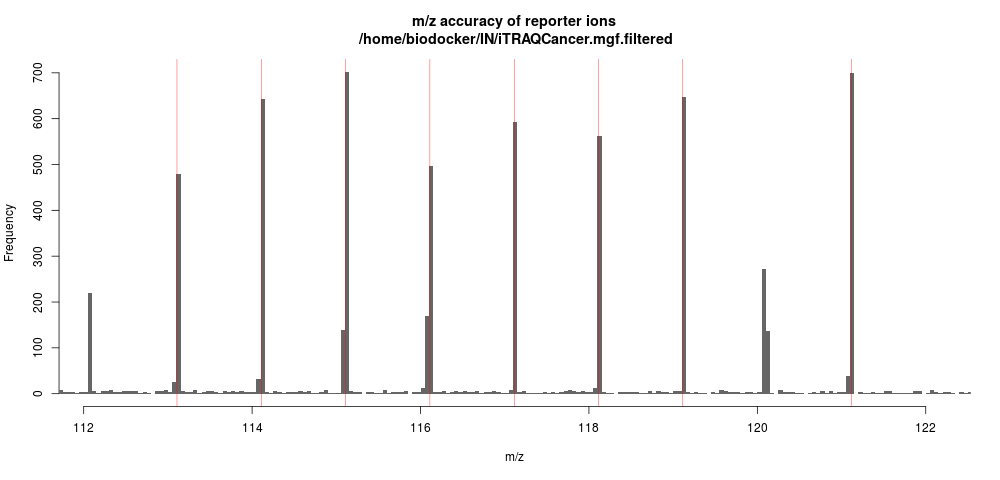

In [18]:
import rpy2.robjects as ro
from IPython.display import display,HTML
import sys
display(HTML("<h4>Processing identification data...</h4>"))

%R PSMDat <- PepDat <- ProtDat <- list()
for s in samples:
    # Organize technical runs in the same folder
    # filenames
    %R -i s
    display(HTML("** Processing files from folder " + "(" + str(samples.index(s)+1) + " of " + str(len(samples)) + ")" ))
    ro.reval('''
    #message(paste("\r** Processing files from folder ", s, " (",which(s==samples)," of ",length(samples)," folders)",sep=""))
    ident_files <- all_ident_files[s]
    mgf_files <- list.files(spectradirs[s],pattern="mgf.filtered$",full.names = T)
    if (is.null(ident_files)) stop("Error: No identification files")
    if (is.null(mgf_files))   stop("Error: No spectrum files")
    if (!file.exists(ident_files)) stop(paste("Error: Cannot find identification files", ident_files))
    for (mgf_file in mgf_files) {
        if (!file.exists(mgf_file)) {
             stop("Error: Cannot find mgf file ", mgf_file)       
        }
    }
    # ---- load the PSMs ----
    max_fdr <- search_in["target_fdr"]
    psms <- read.csv(ident_files, sep = "\t",stringsAsFactors = F)
    if (! "Decoy" %in% names(psms)) {
        stop("Error: No decoy information available in output file")
    }
    #message(paste("\r - Loaded",nrow(psms), "PSMs"))
    num_psms <- nrow(psms)
    ''')
    num_psms = ro.r.num_psms[0]
    display(HTML(" - Loaded " + str(num_psms) + " PSMs"))
    
    ro.reval('''
    # ---- Confidence filter ----
    # TODO: This could be replaced by the PeptideShaker functionality
    psms <- psms[order(psms[, "Confidence...."], decreasing = T), ]
    decoy.psms <- which(psms[, "Decoy"] == "1")
  
    decoy.count <- 0
  
    for (decoy.index in decoy.psms) {
        decoy.count <- decoy.count + 1
        target.count <- decoy.index - decoy.count
        cur.fdr <- (decoy.count * 2) / (decoy.count + target.count)
    
        if (cur.fdr > max_fdr) {
          # filter
          psms <- psms[1:decoy.index - 1,]
          break
        }
    }
  
    #message(paste0(" - Filtered ", nrow(psms), " PSMs @ ", max_fdr, " FDR"))
    num_psms <- nrow(psms)
    
    if (nrow(psms) < 1) {
        stop("Error: No valid PSMs found")
    }
    ''')
    
    num_psms = ro.r.num_psms[0]
    max_fdr = ro.r.max_fdr[0][0]
    display(HTML(" - Filtered " + str(num_psms) + " PSMs @ " + str(max_fdr) + " FDR"))
    
    ro.reval('''
    # ---- prepare for MSnbase ----
    psms$rank <- 1
    psms$desc <- psms$Protein.s.
    psms$spectrumID <- psms$Spectrum.Title 
    #str_extract(psms$Spectrum.Title, "scan=[0-9]*")
    psms$spectrumFile <- psms$Spectrum.File
    psms$idFile <- ident_files
    # remove unnecessary PTMs from modified sequence
    # TODO: define whether to take oxidation, ...
    psms$Modified.Sequence <- gsub("<cmm>","",psms$Modified.Sequence)
    psms$Modified.Sequence <- sub("[a-z,A-Z]*-","",psms$Modified.Sequence)
    psms$Modified.Sequence <- sub("-[a-z,A-Z]*","",psms$Modified.Sequence)
    psms$Modified.Sequence <- gsub("<iTRAQ>","",psms$Modified.Sequence)
    psms$Modified.Sequence <- gsub("<TMT>","",psms$Modified.Sequence)
    psms$sequence <- psms$Modified.Sequence
    # Optional:
    # psms$Modified.Sequence <- gsub("<ox>","",psms$Modified.Sequence)
    #message(" - loading spectra (this may take a while) ...")
    ''')
    display(HTML(" - Loading spectra (this may take a while) ..."))
    
    ro.reval('''
    # --- Load the spectra ----
    allSpectra <- list()
    for (mgf_file in mgf_files) {
        myExp1 <- readMgfData(mgf_file, verbose=F)
    
        for (i in 1:ncol(fData(myExp1))) {
          if (is.factor(fData(myExp1)[,i]))
            fData(myExp1)[,i] <- as.character(fData(myExp1)[,i])
        }
        fData(myExp1)$spectrumFile <- mgf_file
        allSpectra[[mgf_file]] <- myExp1
    }
    ''')

    ro.reval('''
    # ---- merge identification and spectra data and run the quantification ----
    # get the MSnbase quantification object
    known.methods <- c("TMT10","TMT6","iTRAQ4","iTRAQ8","iTRAQ4", "iTRAQ8")
    selected.method <- gsub(" \\\\(.*", "", search_in["labelling_method"][[1]])
    
    if (!selected.method %in% known.methods) {
        stop("Error: Labelling method not supported")
    }
    
    quant.method <- get(selected.method)
    
    # run the merging and quantification in parallel
    myExp <- qnt <- list()
    
    ''')
    mgf_files = []
    mgf_files.extend(ro.r.mgf_files)
    num_mgfs = str(len(mgf_files))
    for mgf_file in mgf_files:
        display(HTML("Getting reporter ions (quantification) from " + mgf_file + "\n(" + 
                     str(mgf_files.index(mgf_file)+1) + " of " +  num_mgfs + " files)"))
        %R -i mgf_file
        ro.reval('''
        cl <- makeCluster(NumThreads)
        myExp[[mgf_file]] <- addIdentificationData(
            allSpectra[[mgf_file]],
            psms,
            decoy="Decoy",
            rank="rank",
            acc="Protein.s.",
            icol="Spectrum.Title",
            fcol="TITLE",
            desc="desc",
            pepseq="Modified.Sequence",
            verbose=F)
        #print(idSummary(myExp[[mgf_file]]))
        
        # remove all unidentified spectra
        myExp[[mgf_file]] <- removeNoId(myExp[[mgf_file]])
        
        # quantify everything
        qnt[[mgf_file]] <- quantify(myExp[[mgf_file]], 
                                    method = "sum", 
                                    reporters = quant.method, 
                                    strict = F, verbose = F)
        stopCluster(cl)
        # Plot reporter QC
        plotQCHist <- function() {
        hist(unlist(mz(myExp[[mgf_file]])), 1000, main=paste("m/z accuracy of reporter ions\n",mgf_file), 
            xlim=range(quant.method@mz)+c(-1,1),xlab="m/z",col="#666666",border=NA)
            abline(v=quant.method@mz,col=2,lwd=0.5)
        }
        # save histograms as pdf and png files       
        png(filename=paste(sampledirs[s],"/QC_ReporterIons_",basename(mgf_file),".png",sep=""),width=1200,height=1200)
        plotQCHist()
        dev.off()
        pdf(file=paste(sampledirs[s],"/QC_ReporterIons_",basename(mgf_file),".pdf",sep=""),width=8,height=8)
        plotQCHist()
        dev.off()

        ''')
        %R --width=1000 plotQCHist()

    ro.reval('''    
    # ---- run the impurity correction ----
    imp <- makeImpuritiesMatrix(length(quant.method),edit=F)
    for (i in 1:length(qnt)) {
        qnt[[i]] <- purityCorrect(qnt[[i]],imp)
        exprs(qnt[[i]]) <- log2(exprs(qnt[[i]]))
        qnt[[i]] <- normalise(qnt[[i]],"center.median")
        qnt[[i]] <- updateFeatureNames(qnt[[i]],label = paste("Sample",i))
    }
    
    # ---- combine the quantification data ----
    names(qnt) <- NULL
    allqnt <- do.call("combine",args=qnt)
    allqnt <- filterNA(allqnt, pNA=0.5)

    # ---- add the sample annotations ----
    SampleExpDesign <- ExpDesign[ExpDesign$spec_dir == s,]
    if (nrow(SampleExpDesign) != nrow(pData(allqnt))) {
        stop("Error: Experimental design does not fit the number of quantified samples.")
    }

    # merge the annotations
    pdata.org <- pData(allqnt)
    pdata.combined <- merge(pdata.org, SampleExpDesign, all.x = T, all.y = F, by.x = 0, by.y = "channel")
    rownames(pdata.combined) <- pdata.combined[, "Row.names"]
    pdata.combined$Row.names <- NULL
    outfile <- paste(sampledirs[s],"/AllQuantPSMs.RData",sep="")
    ''')
    display(HTML("\r - Saving PSM quantifications to " + str(ro.r.outfile[0])))
    ro.reval('''
    # save
    #message(paste0("\r - Saving PSM quantifications to ",outfile))
    pData(allqnt) <- pdata.combined[colnames(allqnt), ]
  
    ## Setting the stage for the iPQF inference method
    names(fData(allqnt))[which(names(fData(allqnt))=="Protein.s.")] <- "accession"
    names(fData(allqnt))[which(names(fData(allqnt))=="Variable.Modifications")] <- "modifications"
    names(fData(allqnt))[which(names(fData(allqnt))=="m.z")] <- "mass_to_charge"
    names(fData(allqnt))[which(names(fData(allqnt))=="Confidence....")] <- "search_engine_score"
    
    
    write.csv(cbind(fData(allqnt),exprs(allqnt)),paste(sampledirs[s],"/AllQuantPSMs.csv",sep=""))  
    save(allqnt, file= outfile)
    
    PSMDat[[s]] <- allqnt 
    ''')
    display(HTML("<b>Finished successfully</b>"))
    
    
 


### Basic Quality Control

In [ ]:
%%R --width 800


suppressWarnings(suppressMessages(library(plotly)))
suppressWarnings(suppressMessages(library(reshape)))


panel.cor <- function(x, y, digits=2, prefix="", cex.cor, ...) 
{
    usr <- par("usr"); on.exit(par(usr)) 
    par(usr = c(0, 1, 0, 1)) 
    r <- abs(cor(x, y, use="na.or.complete")) 
    txt <- format(c(r, 0.123456789), digits=digits)[1] 
    txt <- paste(prefix, txt, sep="") 
    cex.cor <- 0.8/strwidth(txt) 
    test <- cor.test(x,y) 
    # borrowed from printCoefmat
    Signif <- symnum(test$p.value, corr = FALSE, na = FALSE, 
                  cutpoints = c(0, 0.001, 0.01, 0.05, 0.1, 1),
                  symbols = c("***", "**", "*", ".", " ")) 
 
    text(0.5, 0.5, txt, cex = cex.cor * r) 
}

panel.hist <- function(x, hist.col="#993333", ...)
{
    usr <- par("usr"); on.exit(par(usr))
   par(usr = c(usr[1:2], 0, 1.5) )
    h <- hist(x, plot = FALSE, border=NA,breaks=50)
    breaks <- h$breaks; nB <- length(breaks)
  y <- h$counts; y <- y/max(y)
    rect(breaks[-nB], 0, breaks[-1], y,col=hist.col,border=NA)
}

condNames <- list()
for (s in samples) {
    allqnt <- PSMDat[[s]]
    
    condNames[[s]] <- ExpDesign[ExpDesign$spec_dir == s,"sample_orig"]
    conditions <- condNames[[s]]
    if (sampledirs[s] != "")
    condNames[[s]] <- paste(paste("Sample", 1:length(conditions)), condNames[[s]], s, sep="\n")
    pData(allqnt)$sample_name <- paste(condNames[[s]], sampledirs[s])
    pData(allqnt)$sample_group <- condNames[[s]]
    
    
    ## QC Plots
    # violin plots to show distribution of PSM quantifications
    conditionsPlot <- rep(conditions, each=nrow(exprs(allqnt)))
    p <- ggplot(melt(exprs(allqnt)), aes(x=X2, y=value, fill=conditionsPlot)) + geom_violin(trim=FALSE) + 
    geom_boxplot(width=0.1) + theme_classic() + theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    xlab("") + ylab("PSM expression") + ggtitle(paste("Distributions in run",s))
    print(p)
    png(filename=paste(sampledirs[s],"/QC_PSM_violinplots.png",sep=""),width=600,height=600)
    print(p)
    dev.off()
    pdf(file=paste(sampledirs[s],"/QC_PSM_violinplots.pdf",sep=""),width=8,height=8)
    print(p)
    dev.off()
    
    # histograms of PSMs and peptides per peptide/protein
    QC_PSMHist <- function() {
        par(mfrow=c(1,3))
        hist(fData(allqnt)$npsm.pep,xlab="Number of PSMs per peptide",100,border=0,col="#AA4444", main="PSM distribution (peptides)")
        hist(fData(allqnt)$npep.prot,xlab="Number of PSMs per protein",100,border=0,col="#44AA44", main="PSM distribution (proteins)")
        hist(fData(allqnt)$npsm.prot,xlab="Number of peptides per protein",100,border=0,col="#4444AA", main="Peptide distribution")
    }
    QC_PSMHist()
    png(filename=paste(sampledirs[s],"/QC_PSM_and_peptide_distribution.png",sep=""),width=800,height=500)
    QC_PSMHist()
    dev.off()
    pdf(file=paste(sampledirs[s],"/QC_PSM_and_peptide_distribution.pdf",sep=""),width=14,height=8)
    QC_PSMHist()
    dev.off()   
     
    par(mfrow=c(1,1))
        
    # Pairwise comparison of samples within on MS run
   QC_Pairs <- function () { 
      pairs(exprs(allqnt),lower.panel=panel.smooth, upper.panel=panel.cor, diag.panel=panel.hist, main = paste("MS run",s),
        cex=0.1,col="#33333388",pch=15, labels =  condNames[[s]])
    }
    QC_Pairs()
    png(filename=paste(sampledirs[s],"/QC_Pairwise_comparison.png",sep=""),width=800,height=800)
    QC_Pairs()
    dev.off()
    pdf(file=paste(sampledirs[s],"/QC_Pairwise_comparison.pdf",sep=""),width=15,height=15)
    QC_Pairs()
    dev.off()   
    

    
    PSMDat[[s]] <- allqnt
    
    
  #print(fData(allqnt))  
}

    


### Protein Inference

In [ ]:
%%R --width 800

####### TODO: implement considering PTMs (or not)

for (s in samples) {
    load(paste(sampledirs[s],"/AllQuantPSMs.RData",sep=""))

    print(paste("Files from",s))
    
    allqnt <- PSMDat[[s]]
    
    #print(colnames(fData(allqnt)))
    
    # get the selected method
    summarization.function <- search_in["summarization_method"][[1]]
    #summarization.function <- "median"
    
    # get minimum peptides
    min_peps <- search_in["min_protein_psms"][[1]]
    
    
    print(paste("Using ",summarization.function,"for summarization to proteins ..."))

    # keep only PSMs with at least 50% coverage over samples
    
    allProts <- NULL
    # remove missing values for iPQF
    if(summarization.function == "iPQF") {
        exprs(allqnt) <- 2^exprs(allqnt)
        # remove all spectra with missing values
        has.missing.values <- (rowSums(is.na(exprs(allqnt))) > 0 | rowSums(exprs(allqnt) == 0)) > 0    
        print(paste0("Removing ", sum(has.missing.values), " PSMs with missing values for quantification"))
        allqnt <- filterNA(allqnt,0.0)
           
        # filter for minimal peptide number
    has_too_few_peps <- fData(allqnt)$npep.prot < min_peps
    num_prot_rm <- length(unique(fData(allqnt)[has_too_few_peps, "accession"]))
    print(paste("Removing",sum(has_too_few_peps),"PSMs corresponding to",num_prot_rm,"proteins with less then",min_peps,"peptides"))

        allProts <- combineFeatures(allqnt, 
                                groupBy=fData(allqnt)$accession, 
                                verbose=F)
        exprs(allProts) <- log2(exprs(allProts))
    } else {
    
        # remove all spectra with missing values
        has.missing.values <- rowSums(is.na(exprs(allqnt)) | rowSums(exprs(allqnt) == 0, na.rm=T)) > ncol(allqnt)*0.5    
        print(paste0("Removing ", sum(has.missing.values), " PSMs with more than 50% missing values for quantification"))
        allqnt <- allqnt[!has.missing.values, ]

                # filter for minimal peptide number
    has_too_few_peps <- fData(allqnt)$npep.prot < min_peps
    num_prot_rm <- length(unique(fData(allqnt)[has_too_few_peps, "accession"]))
    print(paste("Removing",sum(has_too_few_peps),"PSMs corresponding to",num_prot_rm,"proteins with less then",min_peps,"peptides"))

        allProts <- combineFeatures(allqnt, na.rm=T,
                                groupBy=fData(allqnt)$accession, 
                                verbose=F)
    }
 
    # create a plot of all protein expression values
    p <- ggplot(melt(exprs(allProts)), aes(x=X2, y=value, fill=rep(conditions,each=nrow(exprs(allProts))))) + 
            geom_violin(trim=FALSE) + 
            geom_boxplot(width=0.1) +
            theme_classic() + 
            theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
            xlab("") + 
            ylab("Protein expression") + 
            guides(fill=guide_legend(title="Conditions"))

    # display the plot
    print(p)
    png(filename=paste(sampledirs[s],"/QC_Protein_violinplots.png",sep=""),width=800,height=800)
    print(p)
    dev.off()
    pdf(file=paste(sampledirs[s],"/QC_Protein_violinplots.pdf",sep=""),width=8,height=8)
    print(p)
    dev.off()   


    # save the expression values
    write.exprs(allProts,file=paste(sampledirs[s],"/AllQuantProteins.csv",sep=""))
  
    ProtDat[[s]] <- allProts <- exprs(allProts)
    colnames(ProtDat[[s]]) <- condNames[[s]]
}

### Sample similarity and statistics

In [ ]:
%%R --width 1000 


par(mfrow=c(1,1))

# Adjust each protein of each MS run by the mean of their expressions over the channels
# TODO: option for other adjustments (e.g. to pool)?
for (s in samples) {
    ProtDat[[s]] <- ProtDat[[s]] - rowMeans(ProtDat[[s]],na.rm=T)
}


# Merge different samples
    totProts <- ProtDat[[1]]
if (length(samples)>1) {
    print("Merging samples (if needed) ...")
    totProts <- data.frame(rownames(totProts),totProts)
    for (s in samples[2:length(samples)])
        totProts <- merge(totProts,ProtDat[[s]], all=T, by.x=1, by.y=0)
    rownames(totProts) <- totProts[,1]
    totProts <- totProts[,2:ncol(totProts)]
} 


write.csv(totProts,file=paste(out_dir,"/AllQuantProteinsInAllSamples.csv",sep=""))

# PCA
pca <- princomp((totProts[complete.cases((totProts)),]))
  #plot(pca)

QC_PCA <- function() {
    plot(pca$loadings, cex=2, pch=16, col=as.numeric(as.factor(ExpDesign[["sample_orig"]])))
    text(pca$loadings,colnames(totProts), pos=2)
}
QC_PCA()
png(filename=paste(out_dir,"/QC_Stat_PCA.png",sep=""),width=800,height=800)
QC_PCA()
dev.off()
pdf(file=paste(out_dir,"/QC_Stat_PCA.pdf",sep=""),width=8,height=8)
QC_PCA()
dev.off()

print(paste("Quantified a total of",nrow(allProts),"protein groups"))

##Statistics
library(limma)
library(qvalue)
NumCond <- length(unique(ExpDesign$sample_orig))
  if (NumCond < 2)
      stop("Only 1 experimental condition -> no statistics")

design <- model.matrix(~0+factor(ExpDesign$sample_group)-1)
  colnames(design)<-make.names(paste(unique(ExpDesign$sample_orig),sep=""))
  contrasts<-NULL
  First <- 1
  for (i in (1:NumCond)[-First]) contrasts<-append(contrasts,paste(colnames(design)[i],"-",colnames(design)[First],sep=""))
  print(paste("Statistical tests carried out to compare:",contrasts))
  contrast.matrix<-makeContrasts(contrasts=contrasts,levels=design)
  # print(dim(Data))
  lm.fitted <- lmFit(totProts,design)
  lm.contr <- contrasts.fit(lm.fitted,contrast.matrix)
  lm.bayes <- eBayes(lm.contr)
  #topTable(lm.bayes)
 plvalues <- lm.bayes$p.value
fcs <- lm.bayes$coefficients
  qlvalues <- matrix(NA,nrow=nrow(plvalues),ncol=ncol(plvalues),dimnames=dimnames(plvalues))
  # qvalue correction
 for (i in 1:ncol(plvalues)) {
    tqs <- qvalue(na.omit(plvalues[,i]))$qvalues
    qlvalues[names(tqs),i] <- tqs
  }
  

par(mfrow=c(1,3))

statTable <- NULL

# Visualizations: volcano plot, number of regulated proteins per FDR, interactive table
for (i in 1:ncol(plvalues)) {
    # p-value distributions
    QC_pvals <- function() {
        hist(plvalues[,i],100,border=NA,col="#555555", main=paste("p-value distribution\nComparison",colnames(fcs)[i], sep="\n"),         
            xlab="p-values")
    }
    QC_pvals()
    
    # volcano plots
    QC_volcanos <- function() {
        plot(fcs[,i], -log10(qlvalues[,i]),pch=16,col="#44FFFF99",
            xlab="log(fold-change)", ylab="-log10(FDR)", main=paste("Volcano plot\nComparison",
                                                                colnames(fcs)[i], sep="\n"),
            ylim=c(0,max(2,max(-log10(qlvalues[,i]), na.rm=T))))
        abline(h=-log10(c(0.001,0.01,0.05)), col=2:4,lwd=2)
        text(c(0,0,0), c(3,2,1.3),c("FDR=0.001","FDR=0.01","FDR=0.05"),pos=1)
    }
    QC_volcanos()

    
    # Number of sigificant features vs. FDR
    QC_NumSig <- function() {
        ddd <- c(0.0001,sort(qlvalues[,i]))
        plot(ddd, 0:(length(ddd)-1),type="l",xlim=c(1e-3,1),log="x", main=paste("Significant protein versus FDR\nComparison",colnames(fcs)[i], sep="\n")) 
        abline(v=c(0.001,0.01,0.05), col=2:4, xlab="FDR", ylab="Number of proteins")
    }
    QC_NumSig()
    
    # export figures to pdf/png
    png(filename=paste(out_dir,"/QC_Stat_Summary_",colnames(fcs)[i],".png",sep=""),width=1000,height=500)
    par(mfrow=c(1,3))
    QC_pvals()
    QC_volcanos()
    QC_NumSig()   
    dev.off()
    pdf(file=paste(out_dir,"/QC_Stat_Summary_",colnames(fcs)[i],".pdf",sep=""),width=15,height=8)
    par(mfrow=c(1,3))
    QC_pvals()
    QC_volcanos()
    QC_NumSig()   
    dev.off()
par(mfrow=c(1,1))    
    
}

# How far should we go? Clustering (when having more then 2 groups)? 
# Hierarchical clustering of significant features? clusterProfiler?


# Saving stats
statOut <- cbind(fcs, plvalues, qlvalues)
colnames(statOut) <- paste(rep(c("log(fold-change)","p-values","q-values"), each=ncol(plvalues)), colnames(statOut))
statOut <- cbind(Proteins=rownames(fcs),statOut)
#print(head(statOut))
write.csv(statOut, paste(out_dir,"/DifferentiallyRegulatedProteins.csv",sep=""),row.names=F)




### Run your own script

In [ ]:
%%R


# totProts is a table with all quantifications
boxplot(totProts)




In [ ]:
%%R

# test ground for interactive apps
library(plotly)
library(reshape)

#print(head(melt(allProts)))

x <- rnorm(1000)
y <- rchisq(1000, df = 1, ncp = 0)
group <- sample(LETTERS[1:5], size = 1000, replace = T)
size <- sample(1:5, size = 1000, replace = T)

ds <- data.frame(x, y, group, size)

p <- plot_ly(ds, x = x, y = y, mode = "markers", split = group, size = size) %>%
  layout(title = "Scatter Plot")
embed_notebook(p)
print(p)

In [21]:
import json
search_out_string = json.dumps(["/data/140207_medimmune_HD_TMT1_Fr1.mgf","/data/140207_medimmune_HD_TMT1_Fr2.mgf","/data/140207_medimmune_HD_TMT1_Fr3.mgf"])
print(search_out_string)
search_in_string = json.dumps({})


["/data/140207_medimmune_HD_TMT1_Fr1.mgf", "/data/140207_medimmune_HD_TMT1_Fr2.mgf", "/data/140207_medimmune_HD_TMT1_Fr3.mgf"]


In [296]:
display(HTML("<h4>Test</h4>"))
print("Test",flush=True)

a = [1,2,3,5]
a.index(5)



Test


3

In [378]:
    ro.reval('''
    
    # ---- run the impurity correction ----
    imp <- makeImpuritiesMatrix(length(quant.method),edit=F)
    for (i in 1:length(qnt)) {
        qnt[[i]] <- purityCorrect(qnt[[i]],imp)
        exprs(qnt[[i]]) <- log2(exprs(qnt[[i]]))
        qnt[[i]] <- normalise(qnt[[i]],"center.median")
        qnt[[i]] <- updateFeatureNames(qnt[[i]],label = paste("Sample",i))
    }
       # ---- combine the quantification data ----
    names(qnt) <- NULL
    allqnt <- do.call("combine",args=qnt)
    allqnt <- filterNA(allqnt, pNA=0.5)

    # ---- add the sample annotations ----
    SampleExpDesign <- ExpDesign[ExpDesign$spec_dir == s,]
    if (nrow(SampleExpDesign) != nrow(pData(allqnt))) {
        stop("Error: Experimental design does not fit the number of quantified samples.")
    }
  # merge the annotations
    pdata.org <- pData(allqnt)
    pdata.combined <- merge(pdata.org, SampleExpDesign, all.x = T, all.y = F, by.x = 0, by.y = "channel")
    rownames(pdata.combined) <- pdata.combined[, "Row.names"]
    pdata.combined$Row.names <- NULL
    outfile <- paste(sampledirs[s],"/AllQuantPSMs.RData",sep="")
    ''')
    display(HTML("\r - Saving PSM quantifications to " + str(ro.r.outfile[0])))
    ro.reval('''
    # save
    #message(paste0("\r - Saving PSM quantifications to ",outfile))
    pData(allqnt) <- pdata.combined[colnames(allqnt), ]
  
    ## Setting the stage for the iPQF inference method
    names(fData(allqnt))[which(names(fData(allqnt))=="Protein.s.")] <- "accession"
    names(fData(allqnt))[which(names(fData(allqnt))=="Variable.Modifications")] <- "modifications"
    names(fData(allqnt))[which(names(fData(allqnt))=="m.z")] <- "mass_to_charge"
    names(fData(allqnt))[which(names(fData(allqnt))=="Confidence....")] <- "search_engine_score"
    
    
    write.csv(cbind(fData(allqnt),exprs(allqnt)),paste(sampledirs[s],"/AllQuantPSMs.csv",sep=""))  
    save(allqnt, file= outfile)
    
    PSMDat[[s]] <- allqnt 

    ''')
        

<rpy2.rinterface.SexpS4 - Python:0x7f475c19dca8 / R:0xeede468>